In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
input_path = r".\methodologie-du-test\session_3"
input_file = "transactions-fair.csv"
df_transaction_fair = pd.read_csv(os.path.join(input_path, input_file))
print(len(df_transaction_fair), "ROWS")
df_transaction_fair.head()

5000 ROWS


,transaction_id,client_id,product_id,amount,date,label
0,01JD5XMG8C97134AE1DC7FD83C,01JD5XMG8CBA8XE2VB0QDW5K58,01JD5XMG8C8ATR99GKXN0YW22Q,344.0,2024-11-02T18:51:23.988846,legit
1,01JD5XMG8CTYWPM8V7SRR7T12Z,01JD5XMG8CY3WEQQ9MX4KRC6N8,01JD5XMG8CBHC1146AD83XSGGQ,1403.0,2024-10-22T02:12:30.988899,low_risk
2,01JD5XMG8CYMZ4TPM2A3BC725S,01JD5XMG8CH42GGAA440XKMVQ9,01JD5XMG8C8ATR99GKXN0YW22Q,1659.0,2024-11-14T22:19:03.988930,low_risk
3,01JD5XMG8C0SXFZZAV1WD81X52,01JD5XMG8CME9HKH1X5WXJDN56,01JD5XMG8CW1YVP4KGSBD5GZ15,-9830.0,2024-10-31T02:55:26.988968,fraud
4,01JD5XMG8CBPRQNRTTK77V0NPE,01JD5XMG8CFTX4JE6CG86B5BQH,01JD5XMG8CBZF6KNPG930AH400,4035.0,2024-10-23T05:54:34.989002,low_risk


## on supprime les données manquantes

In [3]:
missing_values = df_transaction_fair.isna().sum()
# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

df_transaction_fair_cleaned = df_transaction_fair.dropna(subset=["amount", "date"])
print(len(df_transaction_fair_cleaned), "ROWS")

missing_values = df_transaction_fair_cleaned.isna().sum()
# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
transaction_id      0
client_id           0
product_id          0
amount            129
date              263
label               0
dtype: int64
4616 ROWS
Nombre de valeurs manquantes par colonne :
transaction_id    0
client_id         0
product_id        0
amount            0
date              0
label             0
dtype: int64


## exploration de la répartition des labels en fonction de amount

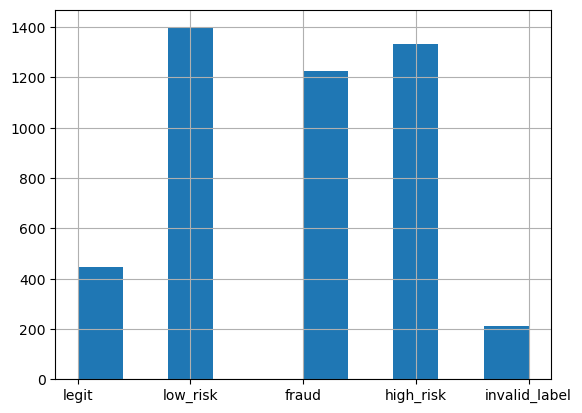

In [4]:
hist = df_transaction_fair_cleaned['label'].hist()

C:\Users\gaeta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


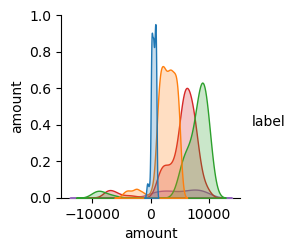

In [5]:
sns.pairplot(df_transaction_fair_cleaned, hue='label')

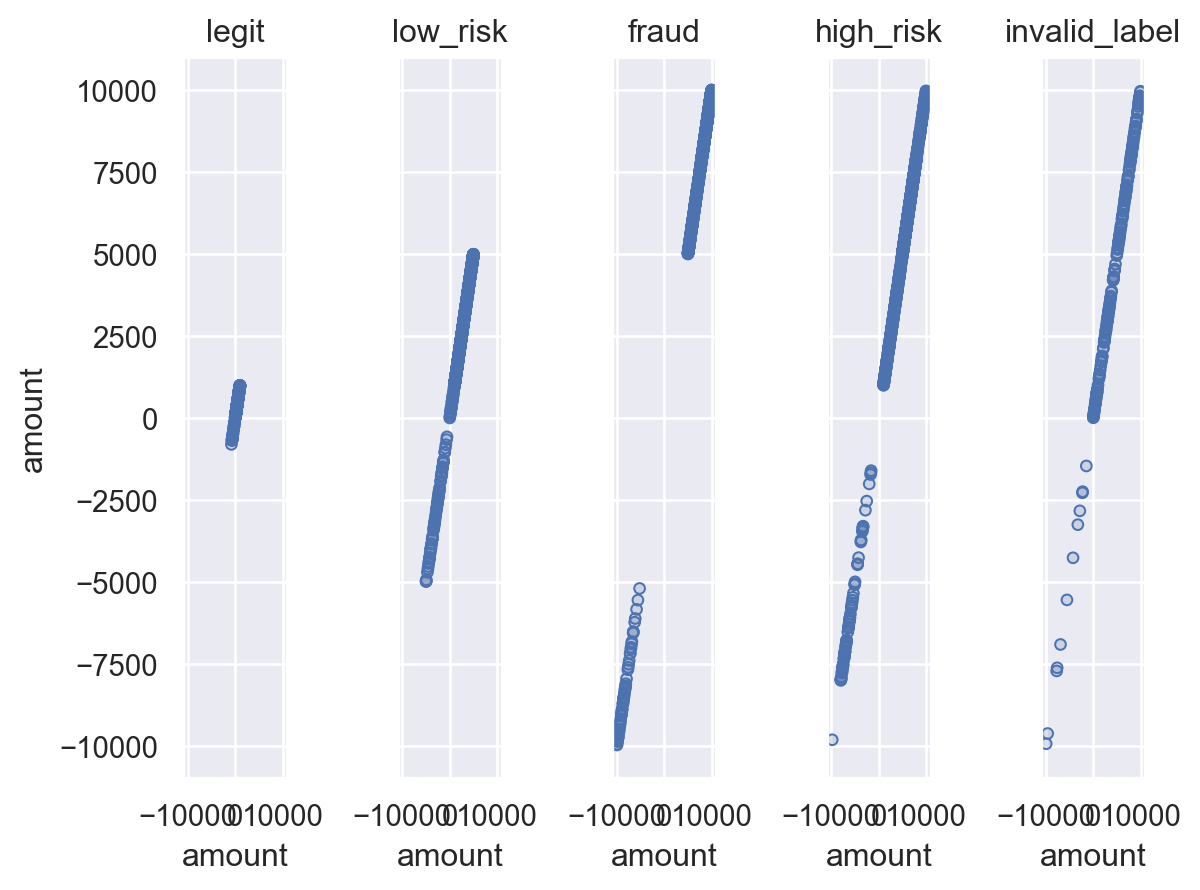

In [6]:
import seaborn.objects as so

p = so.Plot(df_transaction_fair_cleaned, "amount", "amount").add(so.Dots())
p.facet("label")

In [7]:
df_missing_label = df_transaction_fair_cleaned[df_transaction_fair_cleaned['label'] == "invalid_label"]
df_missing_label.head(2)

,transaction_id,client_id,product_id,amount,date,label
38,01JD5XMG8DZPWXHM1HSHC1CMKZ,01JD5XMG8DGKAWK66ATJK1DB08,01JD5XMG8CKXJ7PD4ZCGVJJ58N,5866.0,2024-11-09T11:22:40.989922,invalid_label
51,01JD5XMG8EPKJJMDP9BY9ST30P,01JD5XMG8E70XB9D2RYQMX04WG,01JD5XMG8C18R2JMZF96BP5ZPR,6453.0,2024-10-29T02:41:15.990223,invalid_label


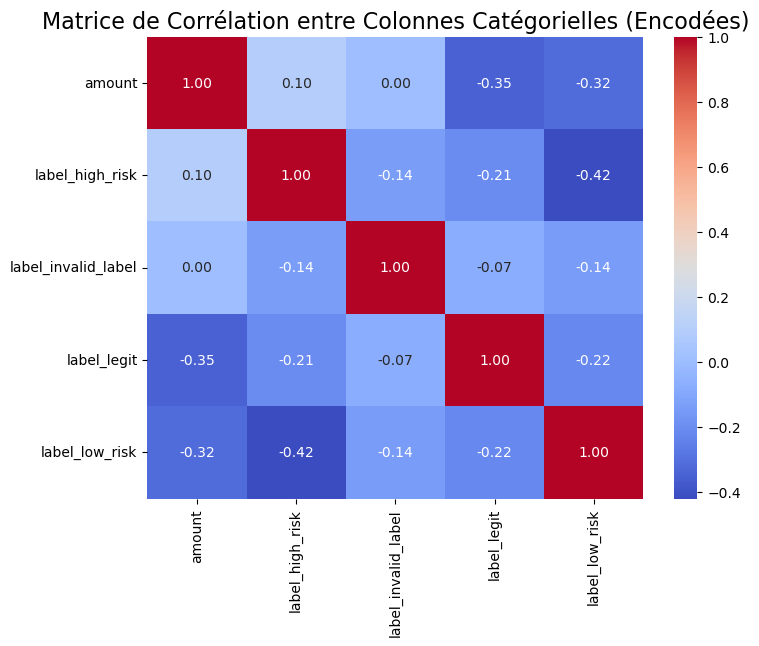

In [8]:
# df_encoded = pd.get_dummies(df_transaction_fair_cleaned, drop_first=True)
df_encoded = pd.get_dummies(df_transaction_fair_cleaned[['amount', 'label']], drop_first=True)
correlation_matrix = df_encoded.corr()

# Affichage de la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation entre Colonnes Catégorielles (Encodées)", fontsize=16)
plt.show()

In [ ]:
# parceque il n'y a aucune correlation entre les fraudes et le fais que le label soit label_invalid_label,
# nous pouvons nous permettre de supprimer ces valeurs